# Introduction #

Streaming is basically delivery of media content either live or recorded to computer and mobile devices through internet. A streaming platform is the aplication that provide the services to watch TV shows and movies. There is a significant increase in the number of OTT platform post pandemic period. Some top streaming platforms are:

* Netflix
* Amazon TV
* HBO Max
* Lionsgate
* Disney Plus

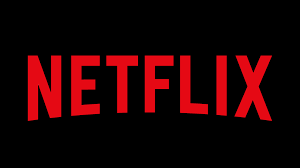

In this project, we analyze a dataset which consists of various features about movies and shows available on these platforms and try to deruve some constructive conclusion by performing Univariate and Bivariete Analysis.


# 1) Problem Statement #

The used dataset consists of **5000+ entries and 15 columns**. Perform an Exploratory Data Analysis in order to get some useful insights and derive constructive conslusion.

# 2) Approach #
To geat a real understanding of data, we propose to perform **Univariate** & **Bivariate Analysis** on the given dataset based on different features present.

# 3) Objective #
To derive constructive conclusion based on data visualization of this large dataset.



# Data & Library Imports #

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import enum
import warnings
import inspect
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [266]:
warnings.filterwarnings('ignore')

In [267]:
df = pd.read_csv("/kaggle/input/netflix-tv-shows-and-movies/titles.csv")

# Dataset at a glance #

In [268]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [269]:
df.shape

(5850, 15)

In [270]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,5850.0,2016.417094,6.937726,1945.000000,2016.0000,2018.000,2020.0000,2022.000
runtime,5850.0,76.888889,39.002509,0.000000,44.0000,83.000,104.0000,240.000
seasons,2106.0,2.162868,2.689041,1.000000,1.0000,1.000,2.0000,42.000
imdb_score,5368.0,6.510861,1.163826,1.500000,5.8000,6.600,7.3000,9.600
imdb_votes,5352.0,23439.382474,95820.470909,5.000000,516.7500,2233.500,9494.0000,2294231.000
tmdb_popularity,5759.0,22.637925,81.680263,0.009442,2.7285,6.821,16.5900,2274.044
tmdb_score,5539.0,6.829175,1.170391,0.500000,6.1000,6.900,7.5375,10.000


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [272]:
df.duplicated().value_counts()

False    5850
dtype: int64

In [273]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

## The follwing conclusions can be drawn from above looking at the summary: ## 

1) The dataset consists of 5850 entries and have 15 columns.

2) There are three dats types present namely, int, float(64) and categorical.

3) There is no duplicate value but there are significant number of null values. These null values have to be handeled as they can affect the final conclusions.


## Dataset Cleaning ##

1. Removing entry with no value for title.
*        **Explantation**: As this row will be of no use as well as there is only one missing values. So we can drop it safely

2. Ignoring Description feature as it has no use in this analysis.

3. Missing values in season is for movies.

4. Mean or median values replacement for features like imdb_score, imdb_votes, tmdb_score and tmdb_popularity.

*          **Explanation**: These are integer values and have less number of missing values, they can be easily replaced by their mean or median. 

## age_certification feature ##

It is evident from the above summarization of data that the maximum missing value is for the 'age_certification' feature. As there are **2619 missing values** , it is not possible to drop them. Also it is more or less half oh the total entries so settling it to mode values will hamper the distribution. 

Therefore, only rows with entry will be considered for analysis.

Follwing are the classification:

* TV-MA: TV Mature Audience Only

* R: Restricted

* PG: Parental Guidance Suggested
 
* TV-14: Parents Strongly Cautioned
 
* PG-13: Parents Strongly Cautioned
 
* TV-PG: Parental Guidance Suggested
 
* TV-Y: All children
 
* TV-G: General Audience
 
* TV-Y7: Directed to Older Children
 
* G: General Audience
 
* NC-17: No Children under 17


# Functions #

In [274]:
def clean_data(dataframe):
    dataframe.dropna(subset=['title'], axis=0, inplace=True)
    dataframe['imdb_score'] = dataframe['imdb_score'].fillna(dataframe['imdb_score'].mean())
    dataframe['imdb_votes'] = dataframe['imdb_votes'].fillna(dataframe['imdb_votes'].median())
    dataframe['tmdb_popularity'] = dataframe['tmdb_popularity'].fillna(dataframe['tmdb_popularity'].median())
    dataframe['tmdb_score'] = dataframe['tmdb_score'].fillna(dataframe['tmdb_score'].median())

In [275]:
def set_sns_elements(palette):
    sns.set_style('dark')
    sns.set_palette(palette)
    sns.set_context("paper", font_scale= 1.4)

set_sns_elements("pastel")

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [277]:
clean_data(dataframe = df)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5849 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5849 non-null   int64  
 7   genres                5849 non-null   object 
 8   production_countries  5849 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5446 non-null   object 
 11  imdb_score            5849 non-null   float64
 12  imdb_votes            5849 non-null   float64
 13  tmdb_popularity       5849 non-null   float64
 14  tmdb_score            5849 non-null   float64
dtypes: float64(5), int64(

## Univariate Analysis ##

In [279]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

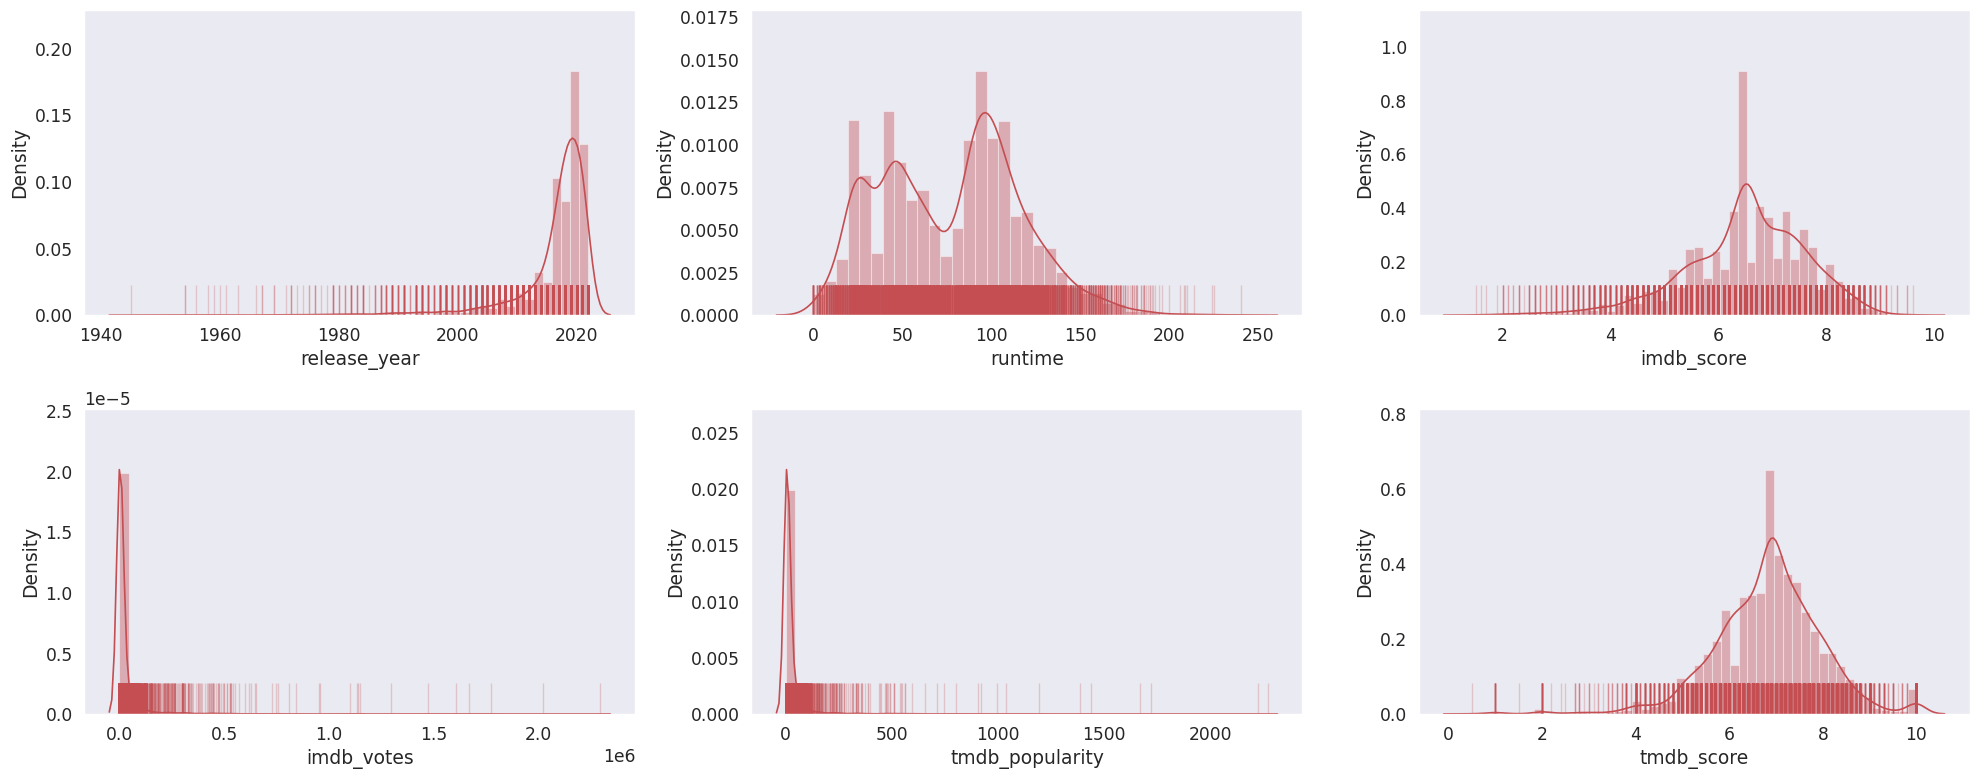

In [280]:
numeric_features = ["release_year", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]

plt.figure(figsize = (20,8))
for i in range(0, len(numeric_features)):
    plt.subplot(2,3,i+1)
    sns.distplot(x= df[numeric_features[i]] ,kde = True, color = 'r')
    sns.rugplot(df, x=df[numeric_features[i]], height = 0.10, alpha = 0.25, color = 'r')


plt.tight_layout()
plt.show()

* **Plot 1** : It is evident from the graph that dataset consists of more latest movies and shows as compared to previous times. The reason for this could be the advancement in the firld of content making that enambles more content making in short period of time

*  **Plot 2**: The distribution is trimodal in nature and positively skewed as well.

* **Plot 3**: IMDB score plot is showin normal distribution

* **Plot 4 and 5**: Both distribution are higly positively skewed which tells that the dataset consists of mostly low rated movies and very few of highly rated and popular ones.

* **Plot 6**: Normal Distribution


## Box Plot

A box displays the five-number summary of a set of data. The five-number summary is the **minimum, first quartile, median, third quartile, and maximum.** In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median.

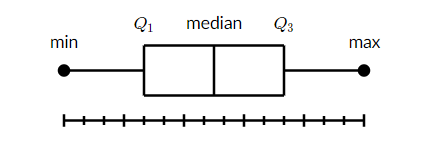

* Q1 (First quartile) = The first quartile is the median of the data points to the left of the median.
* Q3 (Third quartile) = The third quartile is the median of the data points to the right of the median.
* median = The median is the mean of the middle two numbers:
* whisker are min amd max of data range

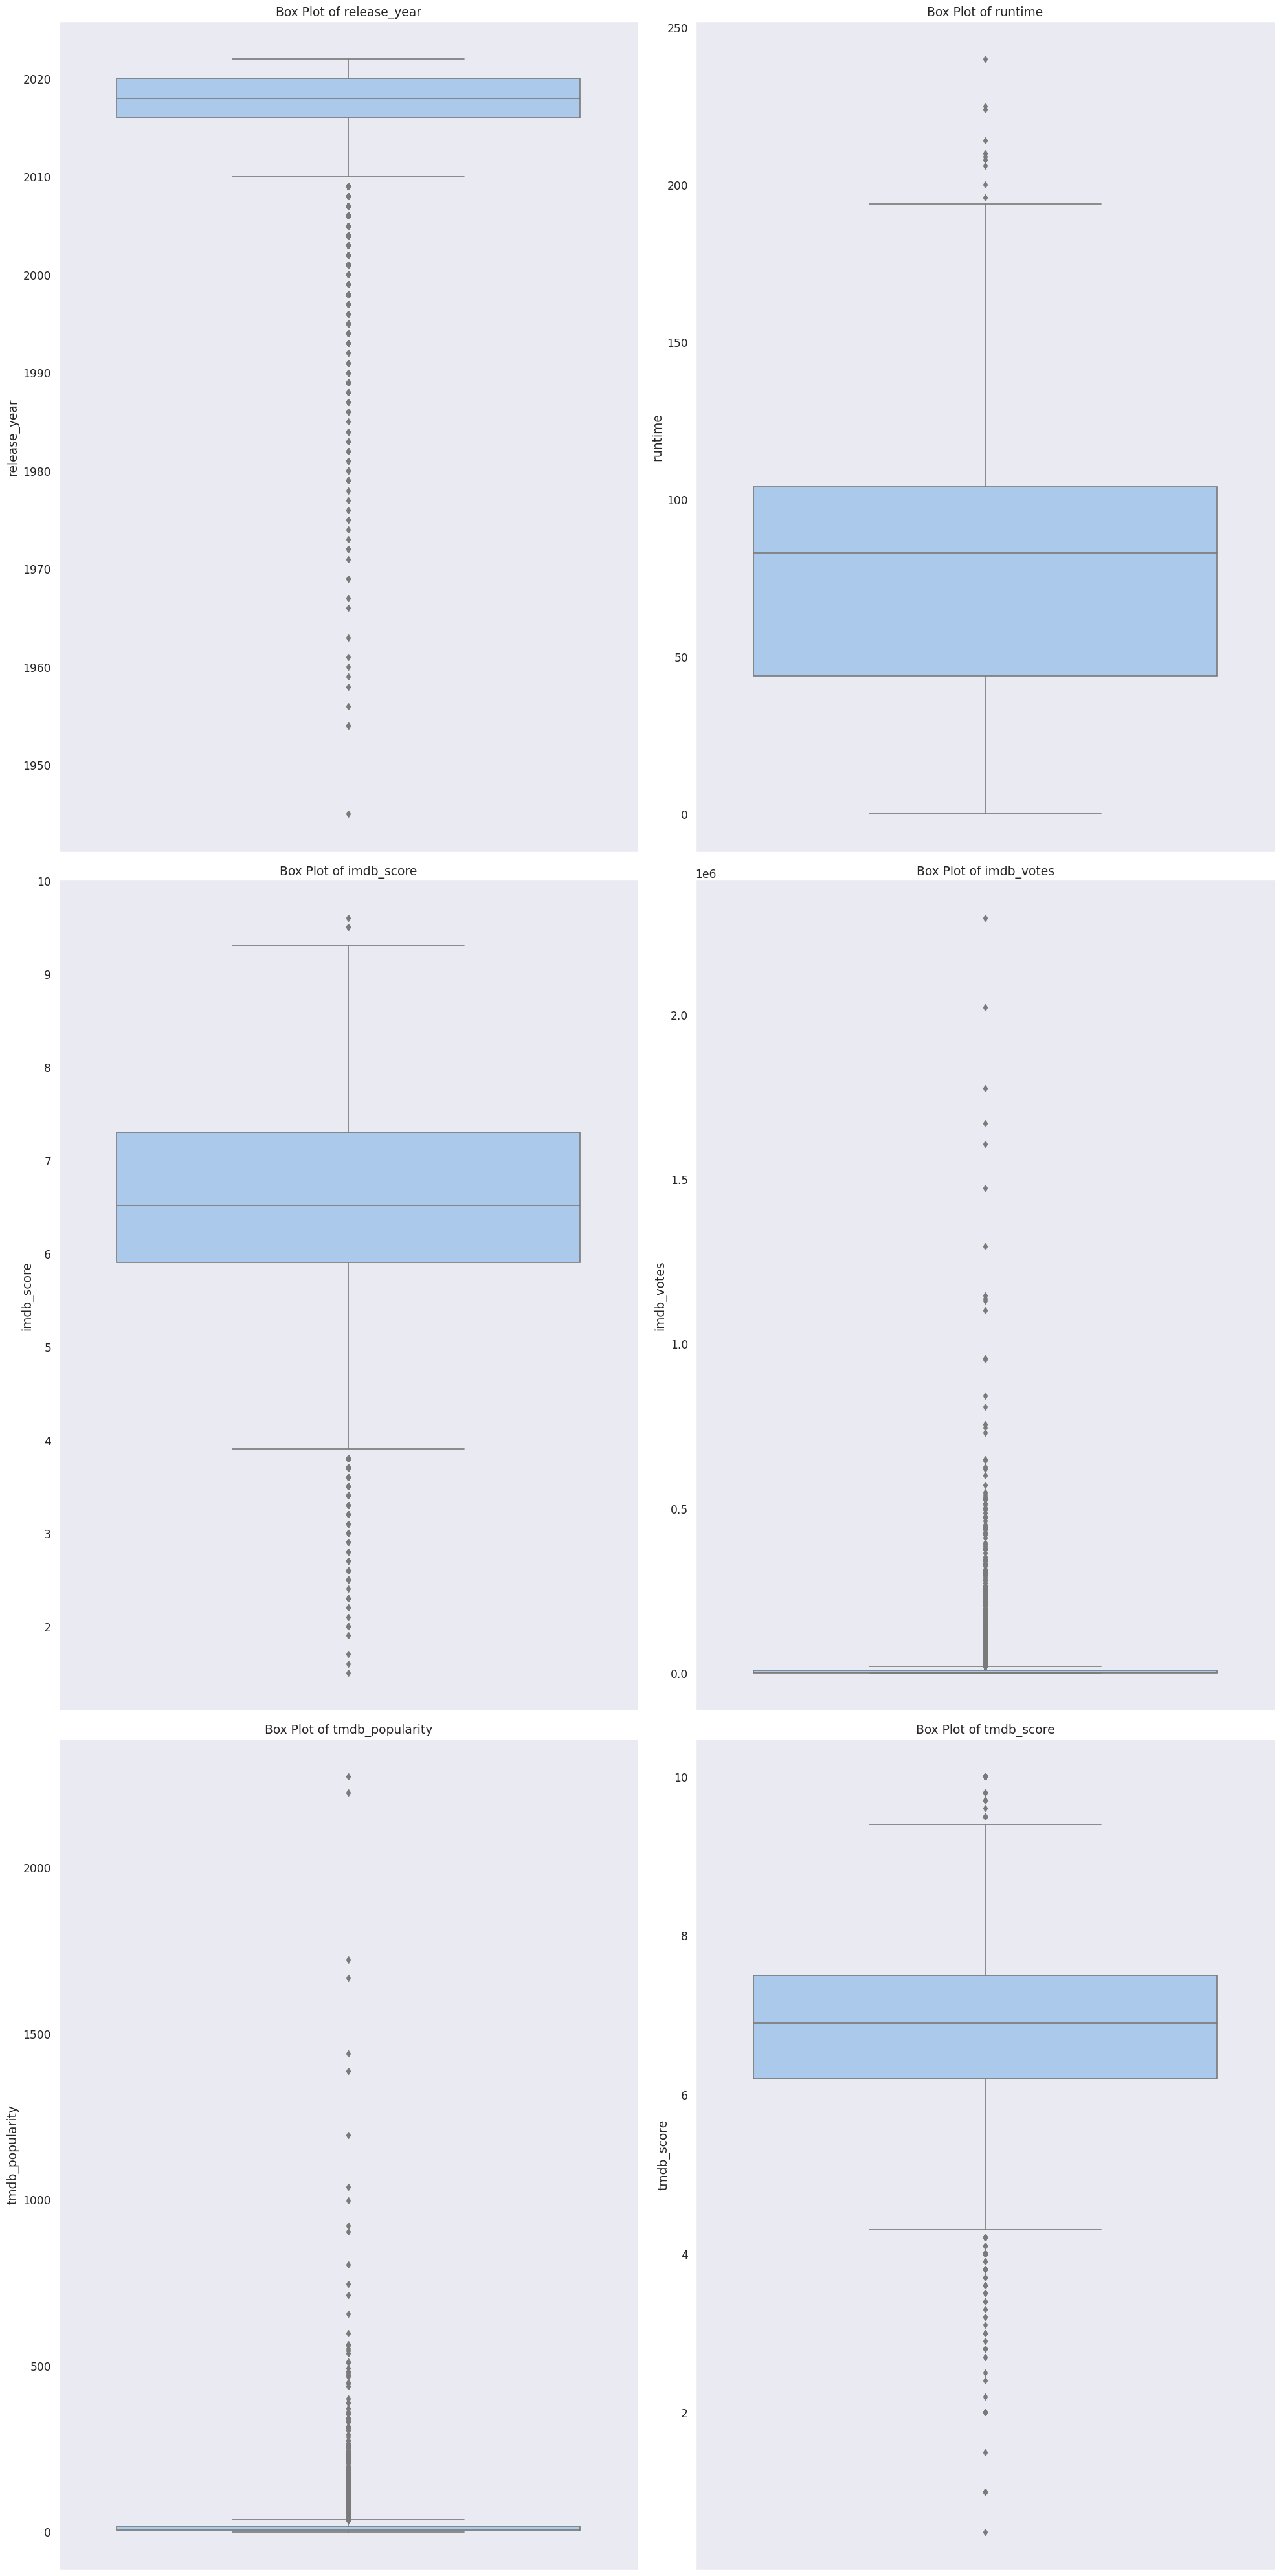

In [281]:
plt.figure(figsize = (20,40))
for i in range(0, len(numeric_features)): 
    plt.subplot(3,2,i+1)
    sns.boxplot(data = df, y= numeric_features[i])
    plt.title(f"Box Plot of {numeric_features[i]}")

plt.tight_layout()
plt.show()

*  **All Plots** : A lot of outliers are present in all numerical features. Presence of outliers in runtime feature plot is less as compared to other plots but it is still evident.

# Count Plot

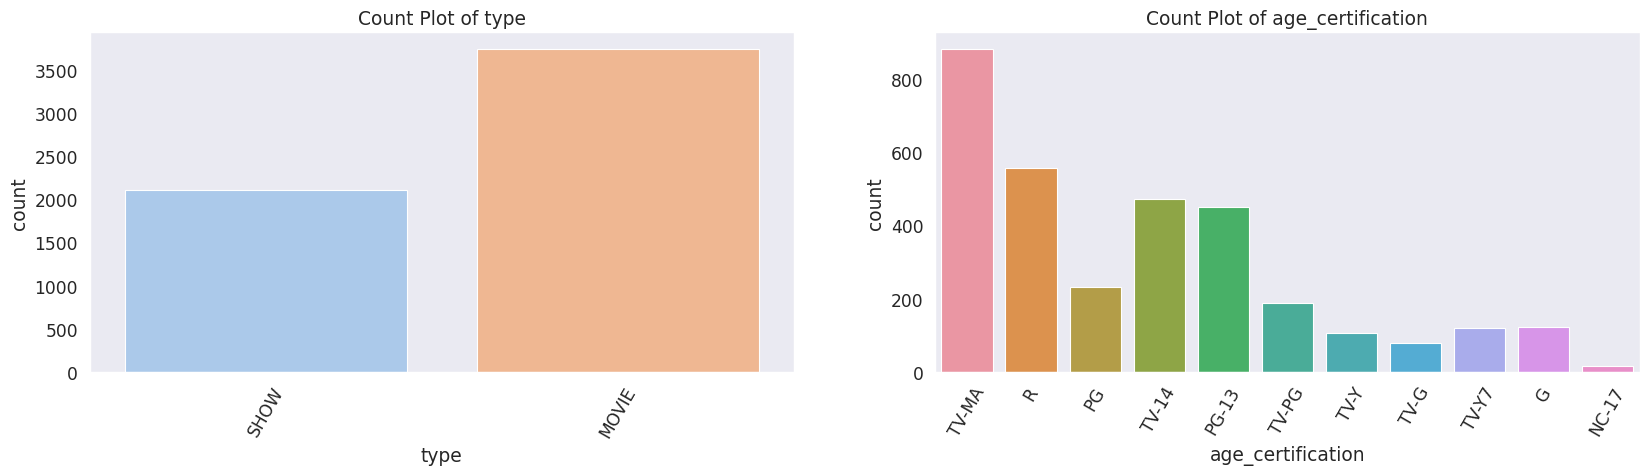

In [282]:
categorical_features = ['type', 'age_certification']
plt.figure(figsize = (20,15))

for i in range(0, len(categorical_features)): 
    plt.subplot(3,2,i+1)
    sns.countplot(data = df, x= categorical_features[i])
    plt.title(f"Count Plot of {categorical_features[i]}")
    plt.xticks(rotation = 60)

* **Plot 1**: The datast consists of more movies than shows. Number of movies are almost double the number of shows

* **Plot 2**: Majority of media content is not kids friendly and have parental guidelines and above instructions. Therefore this dataset can be considered for adults age group.

## Further processing of Dataframe ##

We want to look at the numbers of different genres, highest production countries and number of seasons.

**Problem**: Movies/Series in the dataset have more than one **genres** and **production_countries**. The missing values in the **'season'** feature is for the movies, so to analyse the seasons we'll need to filter out these from the dataframe

**Approach**: To analyze the genres and production_countries, we process these feature such that the first value is taken under consideration. We will make a seperate dataframe for these features and then visualize it.


In [283]:
def convert_to_series(dataframe):
    genres = []
    production_country = []
    seasons = []
    production_total = [x.replace("[", "").replace("]", "").replace("'", "").split(",")[0] for x in df["production_countries"].value_counts().sort_values(ascending=False).keys().unique()[:21]]
    
    for row in dataframe['genres']:
        row_modified = row.replace("[", "").replace("]", "").replace("'", "").split(",")
        for genre in row_modified:
            genres.append(genre)
    for row in dataframe['production_countries']:
        row_modified = row.replace("[", "").replace("]", "").replace("'", "").split(",")
        for country in row_modified:
            if country in production_total:
                production_country.append(country)
                
    for row in dataframe[~dataframe["seasons"].isna()]["seasons"]:
        seasons.append(int(row))
        
    genres_df = pd.DataFrame(genres, columns= ['genre'])
    production_df = pd.DataFrame(production_country, columns=['country'])
    seasons_df = pd.DataFrame(seasons, columns=['season'])
    
    return genres_df, production_df, seasons_df
    
    
genres, production_country, seasons = convert_to_series(df)

In [284]:
production_country = production_country[production_country['country']!='']
production_country

,country
0,US
1,US
2,US
3,GB
4,GB
...,...
5112,PH
5114,PH
5116,US
5117,NG


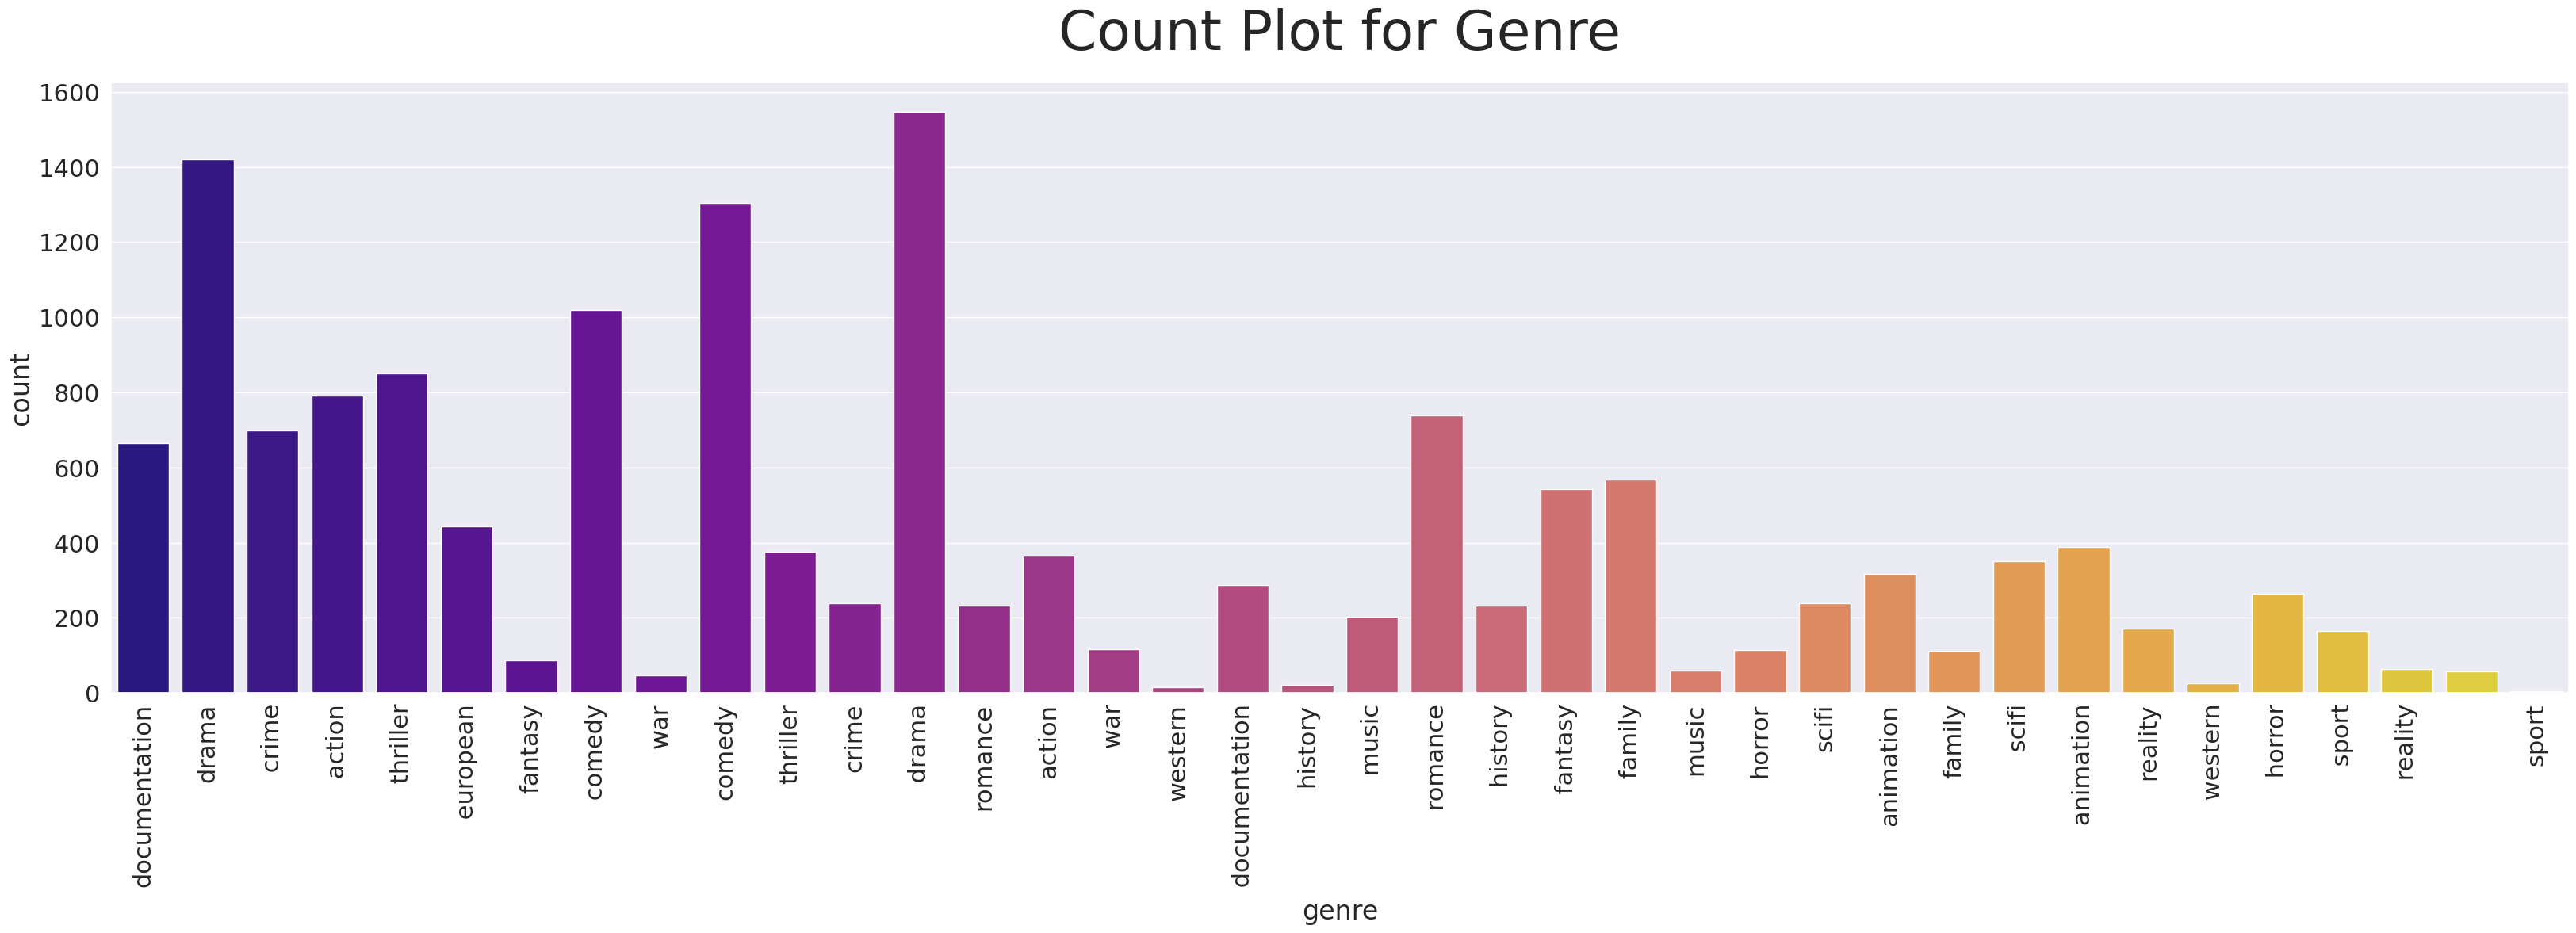

In [285]:
plt.figure(figsize = (40,10), dpi= 100)
sns.set(font_scale=2)
sns.countplot(data = genres, x='genre', palette='plasma')
plt.xticks(rotation= 90)
plt.title("Count Plot for Genre", fontsize=50, pad=30)
plt.show()

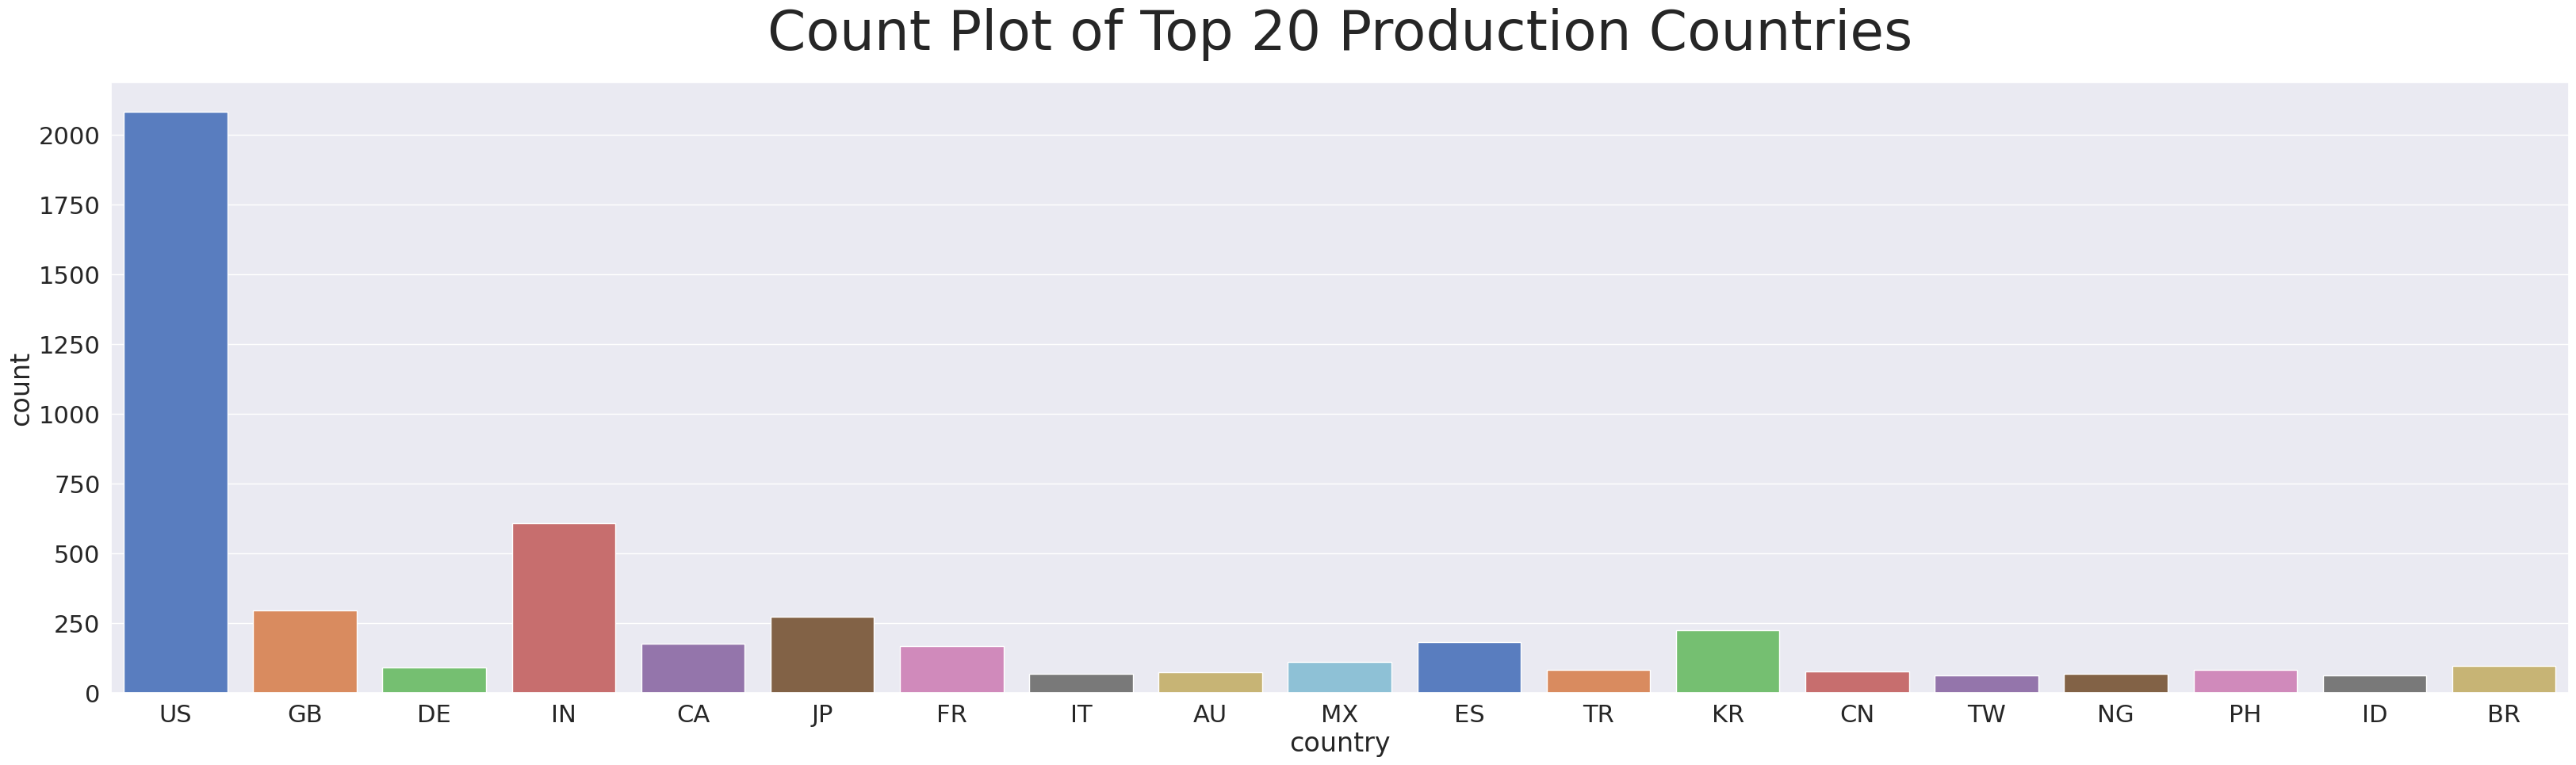

In [286]:
plt.figure(figsize = (40,10), dpi= 100)
sns.set(font_scale=2)
sns.countplot(data = production_country, x='country', palette='muted')
# plt.xticks(fontsize=20)
# plt.yticks(fontsize = 20)
plt.title("Count Plot of Top 20 Production Countries", fontsize=50, pad=30)
plt.show()

* **Plot 1** : It is clear from the above plot that most movies were produced in either United Stated or India.

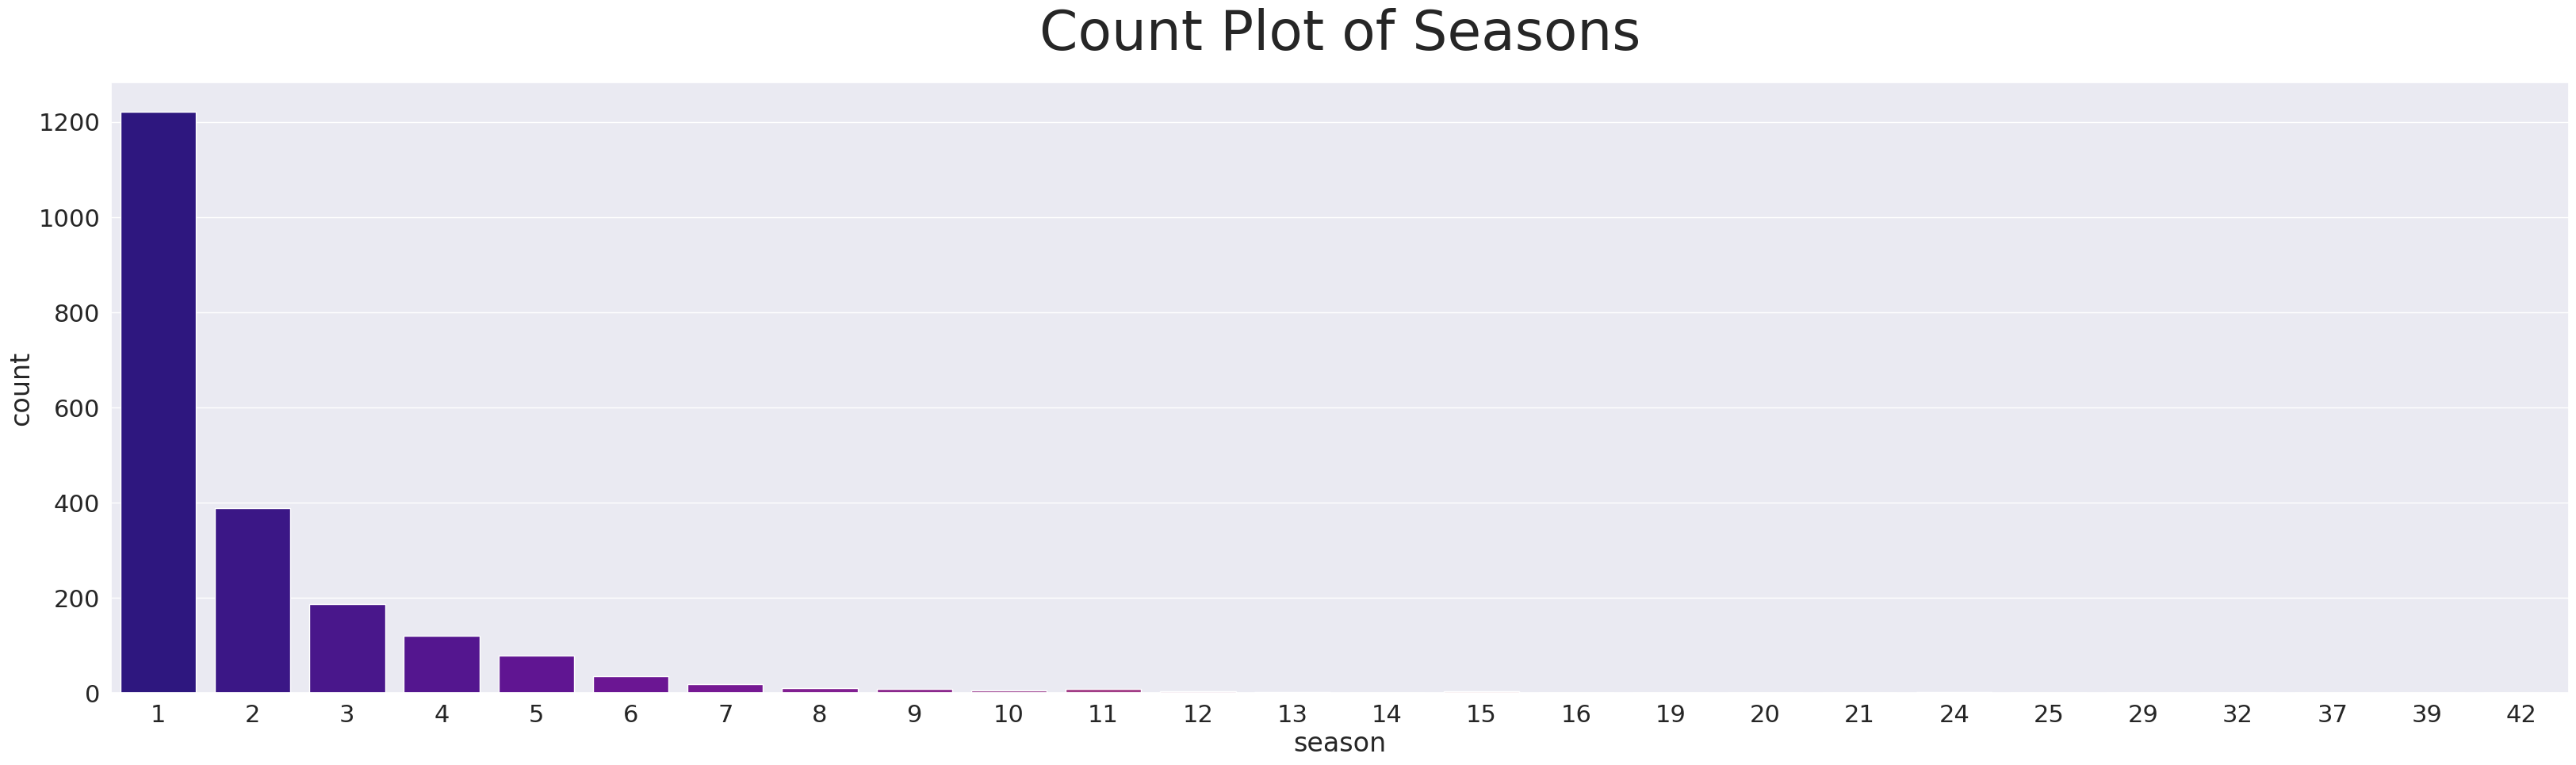

In [287]:
plt.figure(figsize = (40,10), dpi= 100)
sns.set(font_scale=2)
sns.countplot(data = seasons, x='season', palette='plasma')
plt.title("Count Plot of Seasons", fontsize=50, pad=30)
plt.show()

* **Plot 1** : The plot tells us that most of the series shut down after 1 seasons. Hence as the number of seasons increases very few show are able to sustain. This could be due to issue in popularity or end of story line.

In [288]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.09, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(height=300, legend=dict(x=0.1, y=0.5))
fig = go.Figure(data = [trace], layout = layout)
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0), title=dict(text="Distribution of types", font=dict(size=20), automargin=True))
iplot(fig)

**Plot:** It is wvident that the there are more movies than shows. Infact, movies are approximately twice the number of shows

In [289]:
col = "age_certification"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = go.Layout(height=400, legend=dict(x=1, y=1))
fig = go.Figure(data = [trace], layout = layout)
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0), title=dict(text="Distribution of age_certification", font=dict(size=20), automargin=True))
iplot(fig)


**This Plot** shows that the instances are not kids friendly and consists content for adults.

# Line Plot #

In [290]:
d1 = df[df["type"] == "SHOW"]
d2 = df[df["type"] == "MOVIE"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Type of content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

**Plot** shows that growth in numbe rof movies on netflix is much higher than the showa on netflix. The growth in both the types of content peaked from 2013.

# BIVARIATE ANALYSIS #

## BOX PLOT ##

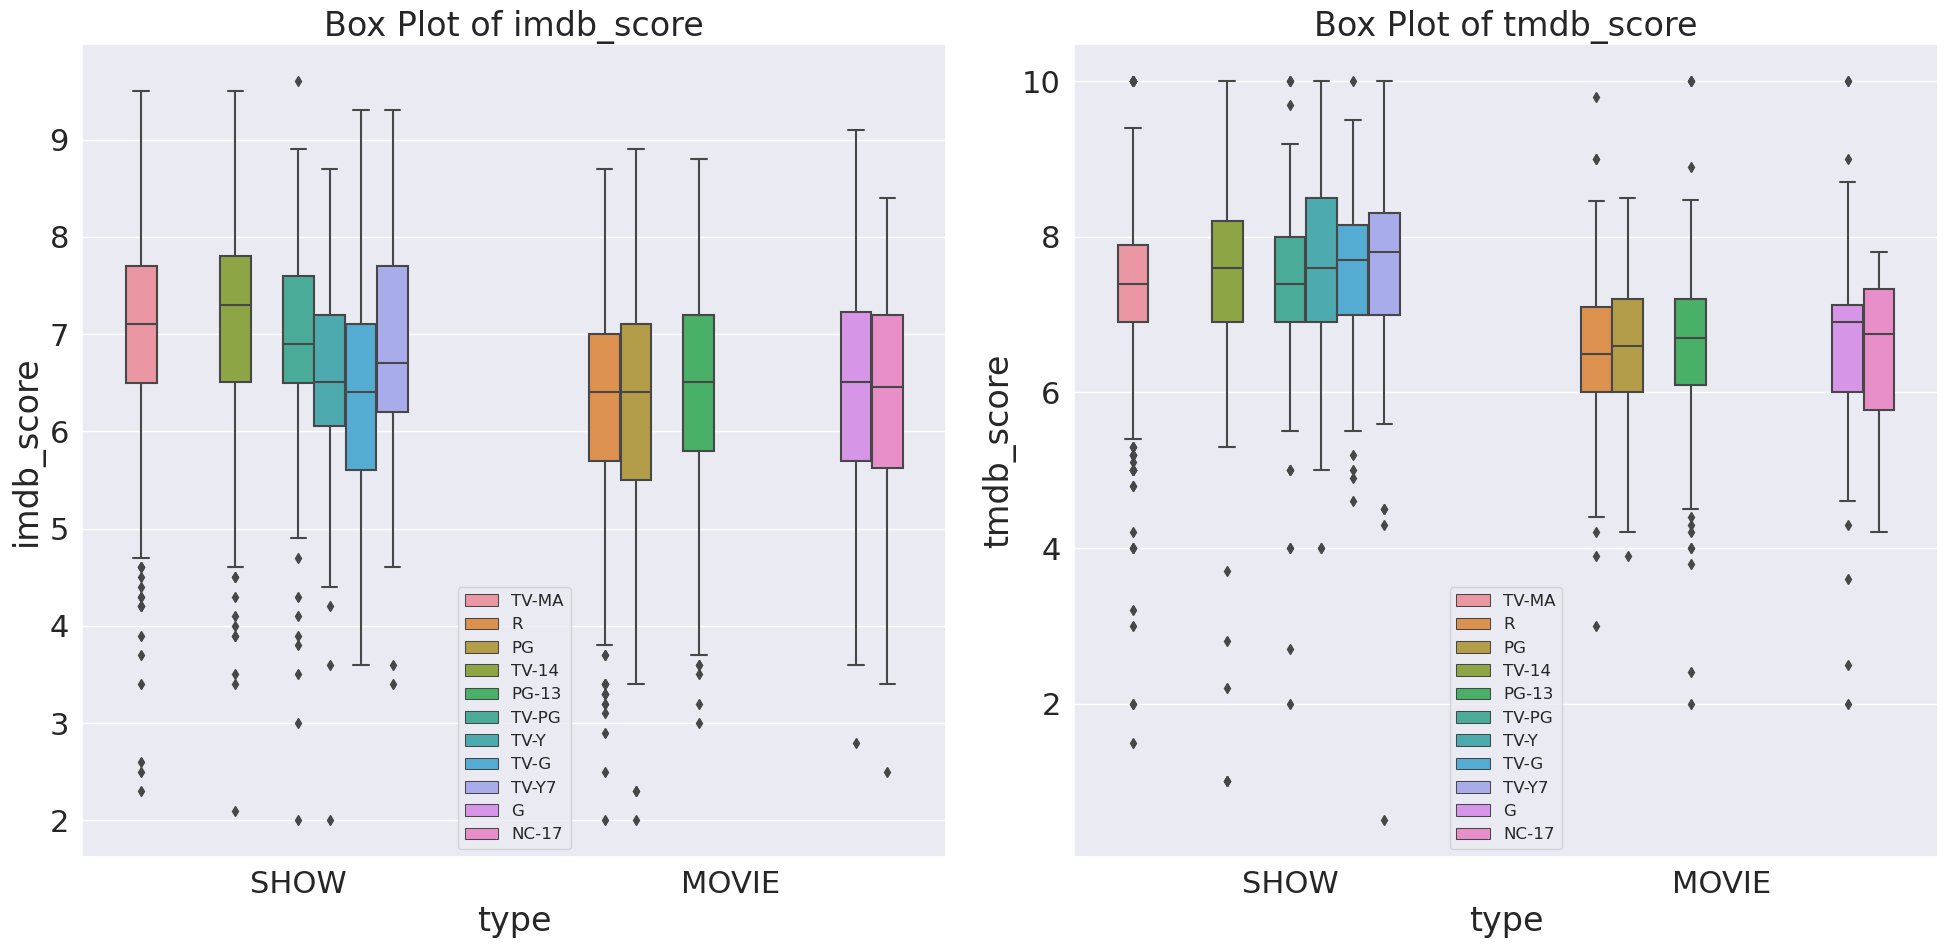

In [291]:
x_features = "type"
y_features = ["imdb_score", "tmdb_score"]

plt.figure(figsize = (20, 10))

for i in range(0, len(y_features)): 
    plt.subplot(1,2,i+1)
    sns.boxplot(data = df, x = x_features, y= y_features[i], hue="age_certification")
    plt.title(f"Box Plot of {y_features[i]}")
    plt.legend(fontsize = 12, loc = 'best')
   
   
plt.tight_layout()
plt.show()

* The above boxplot shows distribution of outliers in the different type of content according to age_certification parameter. 
* The **median** imdb_score of **shows** falling in the category of **TV-MA** is round 7 where as median tmdb_score is around 7.5
* More than 50% PG rated show have imdb_score of less than 7.


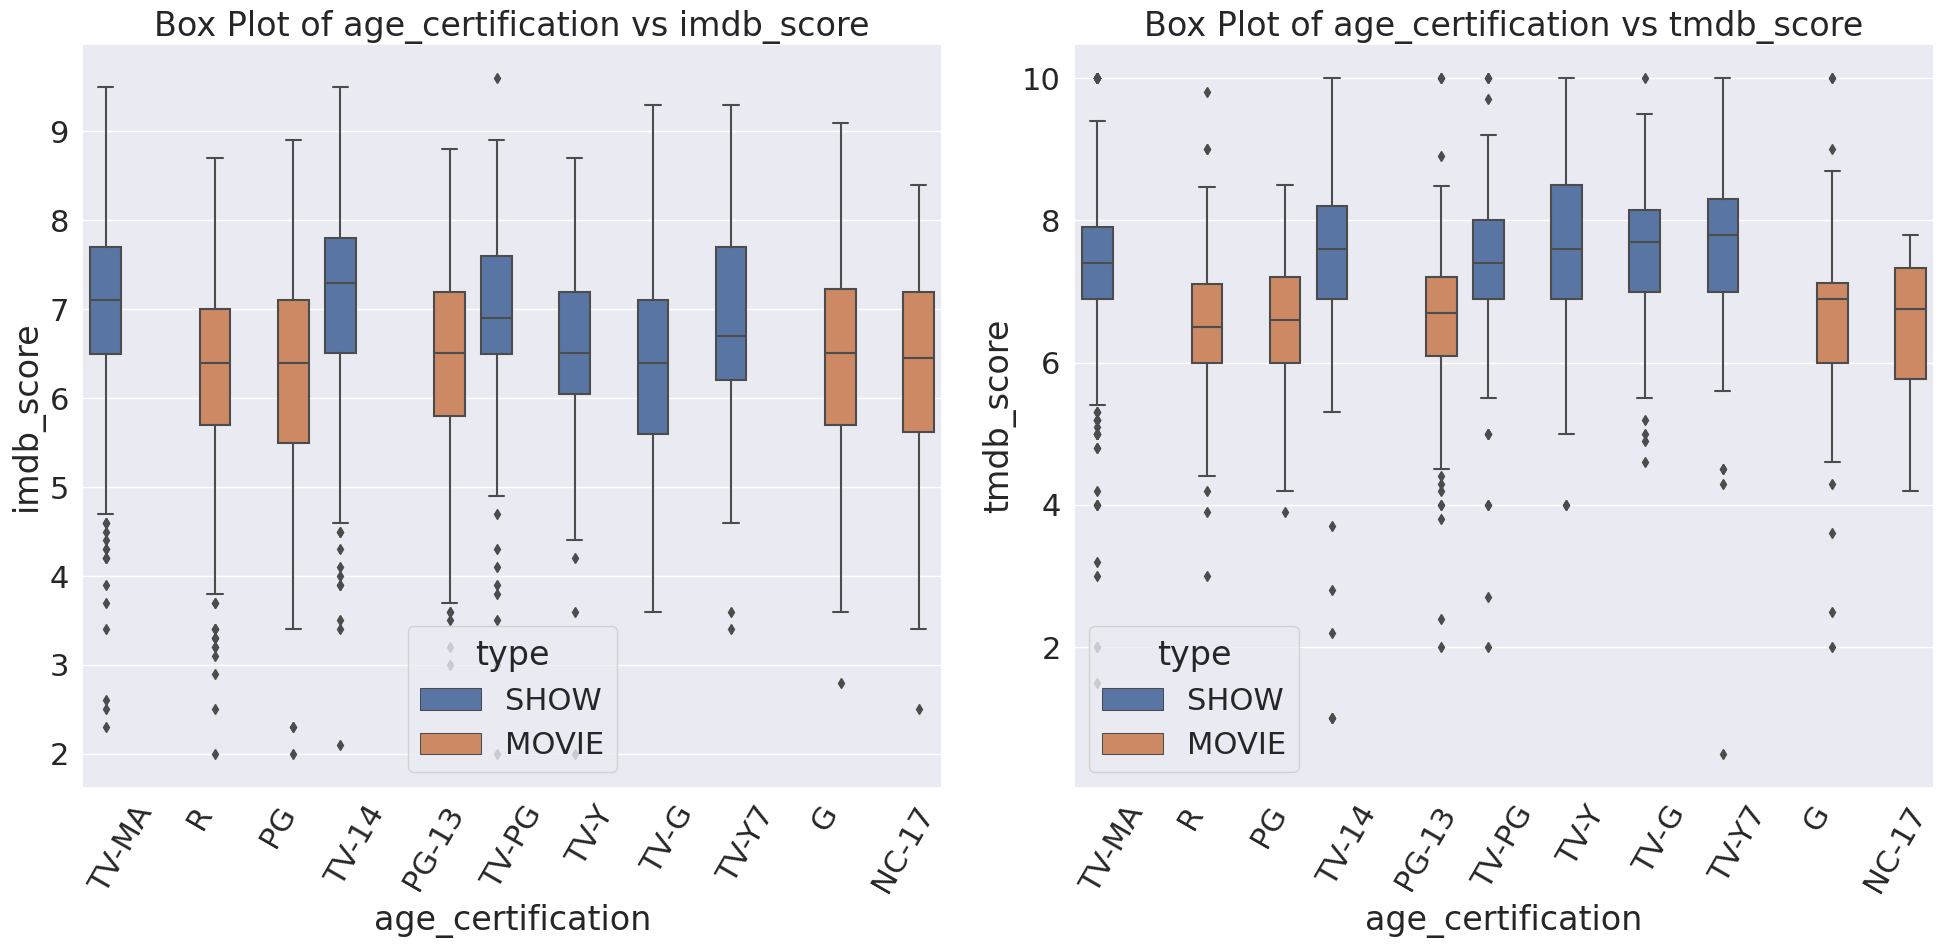

In [292]:
x_features = "age_certification"
y_features = ["imdb_score", "tmdb_score"]

plt.figure(figsize = (20, 10))

for i in range(0, len(y_features)): 
    plt.subplot(1,2,i+1)
    sns.boxplot(data = df, x = x_features, y= y_features[i], hue="type")
    plt.xticks(rotation = 60)
    plt.title(f"Box Plot of {x_features} vs {y_features[i]}")

plt.tight_layout()
plt.show()

* The above boxplot shows distribution of outliers in the different age_certifiacation category according to the type of content.

## BAR PLOT ##

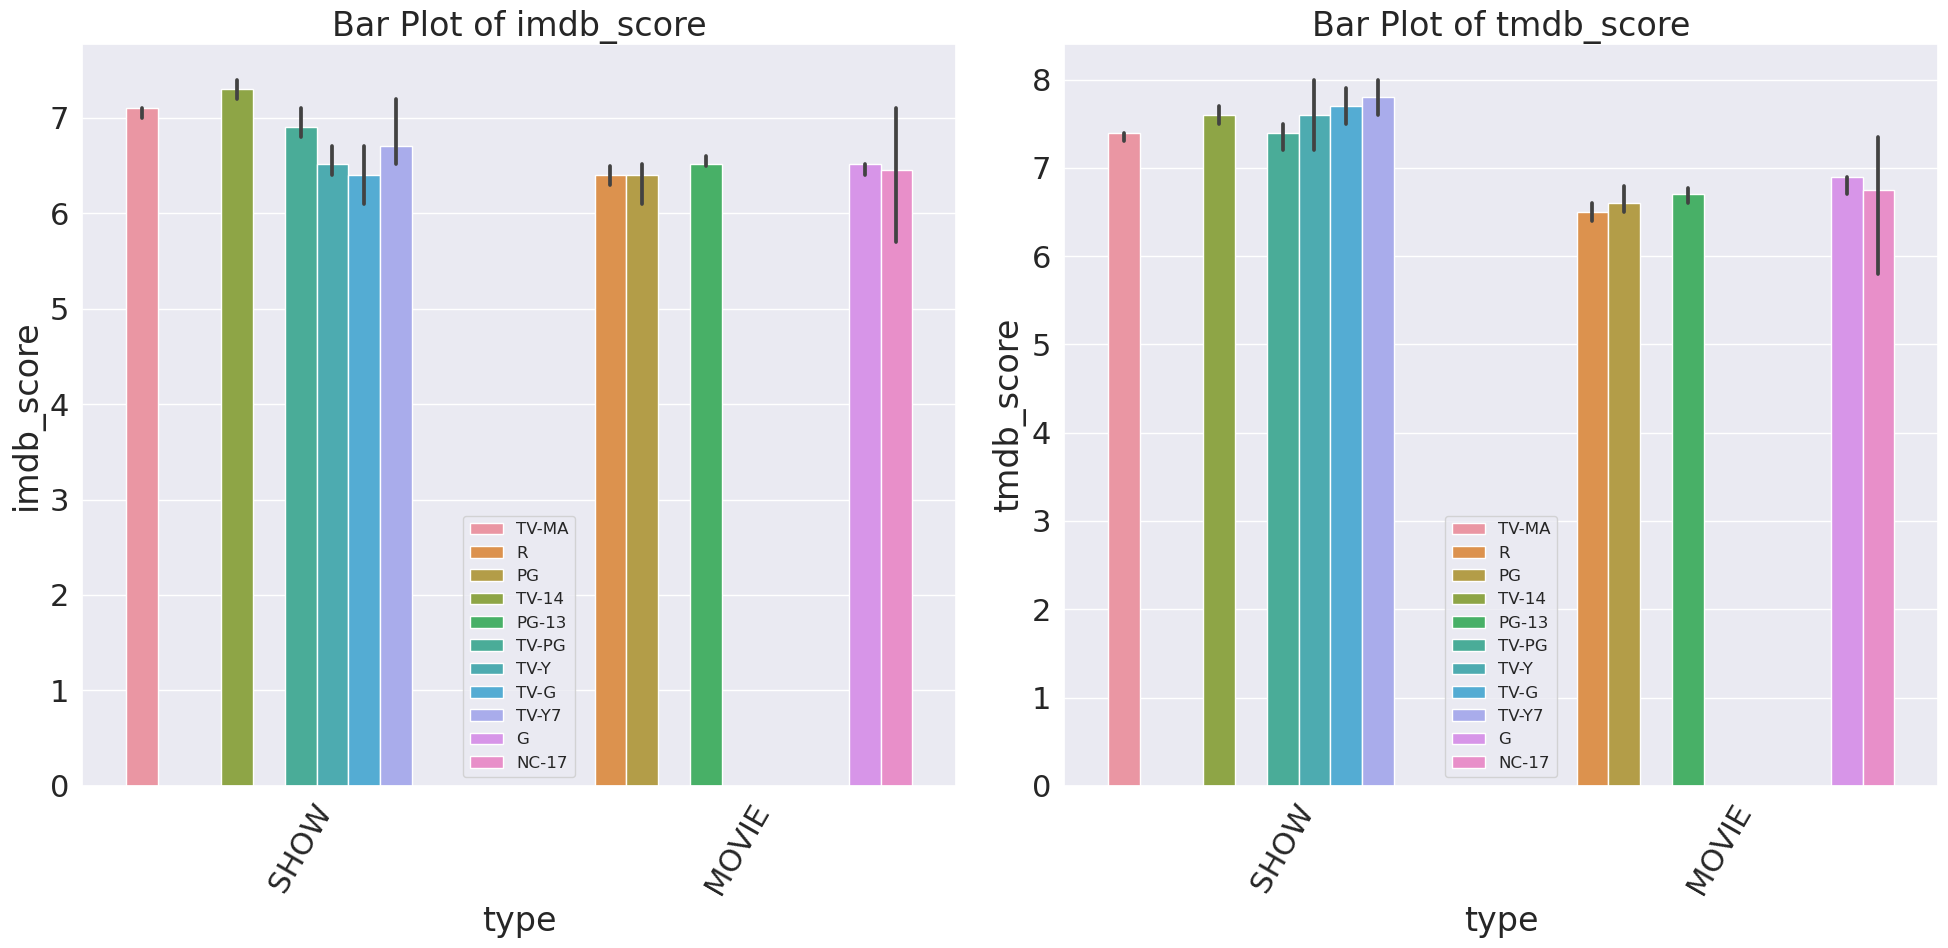

In [293]:
x_features = "type"
y_features = ["imdb_score", "tmdb_score"]
# x_features = ['type', 'age_certification']

plt.figure(figsize = (20, 10))

for i in range(0, len(y_features)): 
    plt.subplot(1,2,i+1)
    sns.barplot(data = df, x = x_features, y = y_features[i], hue='age_certification', estimator = np.median)
    plt.xticks(rotation = 60)
    plt.title(f"Bar Plot of {y_features[i]}")
    plt.legend(fontsize = 12, loc = 'best')

plt.tight_layout()
plt.show()

The abobe **bar plot** shows the variation of imdb score and tmdb score in different age categories wrt type of content. 

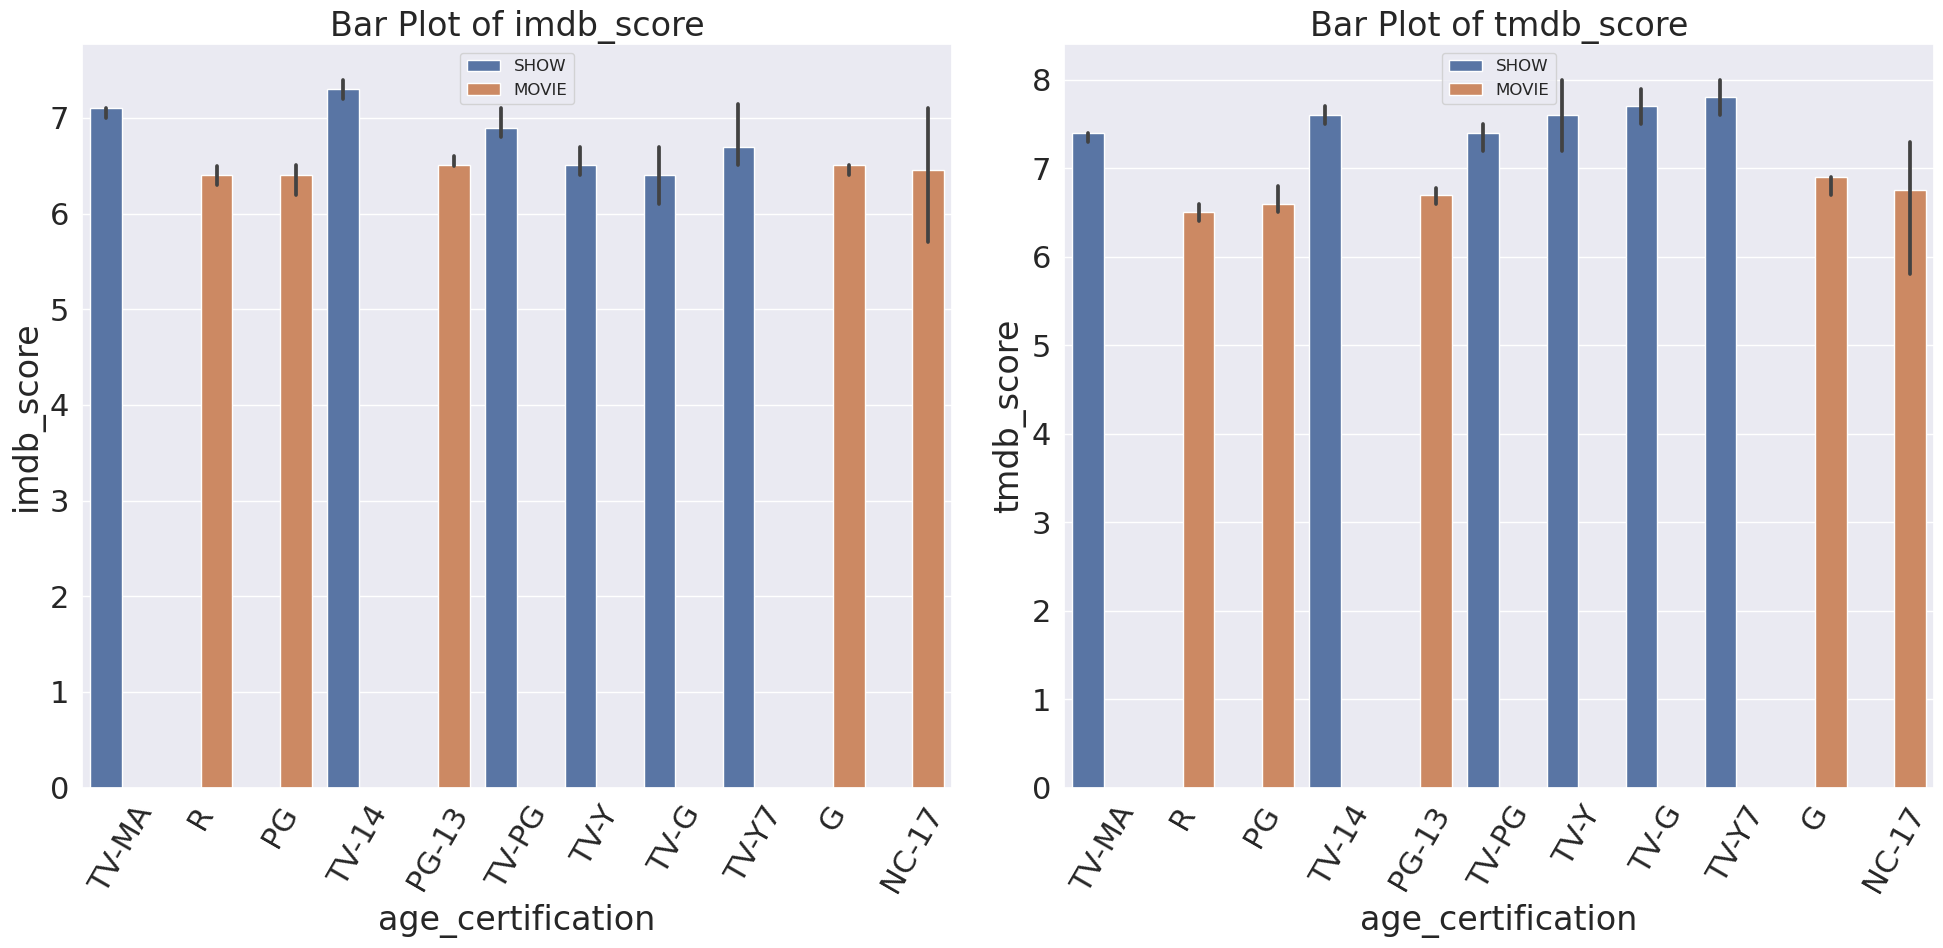

In [294]:
x_features = "age_certification"
y_features = ["imdb_score", "tmdb_score"]
# x_features = ['type', 'age_certification']

plt.figure(figsize = (20, 10))

for i in range(0, len(y_features)): 
    plt.subplot(1,2,i+1)
    sns.barplot(data = df, x = x_features, y = y_features[i], hue='type', estimator = np.median)
    plt.xticks(rotation = 60)
    plt.title(f"Bar Plot of {y_features[i]}")
    plt.legend(fontsize = 12, loc = 'best')

plt.tight_layout()
plt.show()

## PAIR PLOT ##

The  Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. A pair plot can help in becoming familiar with it.

<Figure size 4000x1000 with 0 Axes>

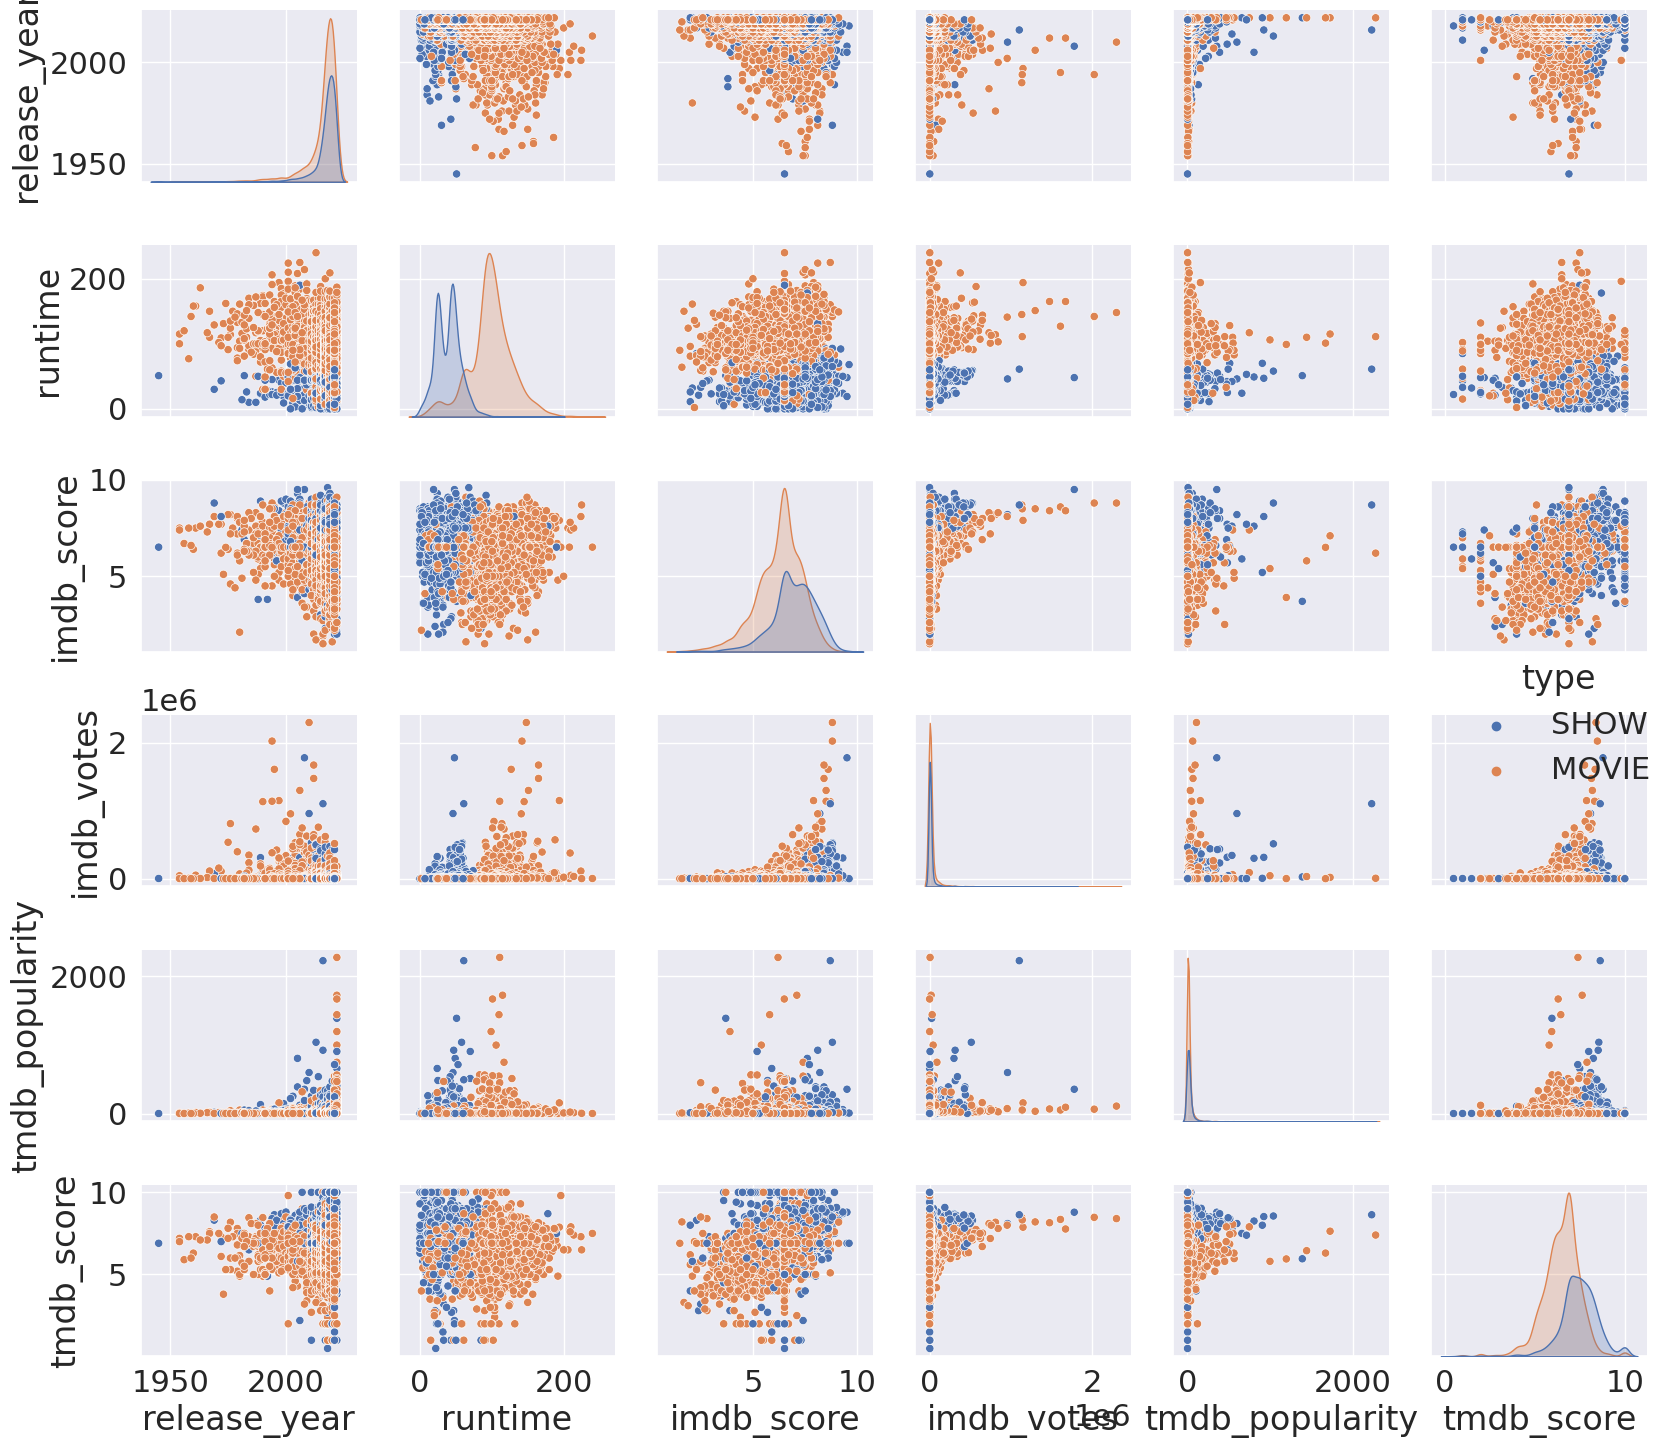

In [295]:
plt.figure(figsize = (40, 10))
df_pp = df.drop(labels=['seasons'], axis=1)
pairplot = sns.pairplot(data = df_pp, hue='type', corner = False)
# individual_fig_size = (20, 20)
# pairplot.fig.set_size_inches(individual_fig_size)
plt.tight_layout()
plt.show()



Above plot shows the pair-wise relationship between different features present in the dataframe

## JOINT PLOT ##

<Figure size 400x800 with 0 Axes>

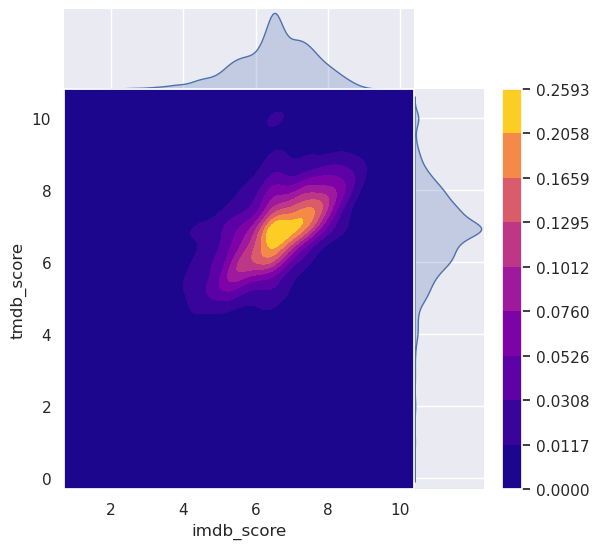

In [296]:
plt.figure(figsize = (4,8))
# individual_fig_size = (8,8)
sns.set(font_scale=1)
x_features = ["imdb_score"] 
y_features = ["tmdb_score"]
jointplot = sns.jointplot(x= x_features[0], y= y_features[0], data= df, kind='kde', space =0, fill= True, thresh=0,cmap='plasma', cbar='true')
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# get the current positions of the joint ax and the ax for the marginal x
pos_joint_ax = jointplot.ax_joint.get_position()
pos_marg_x_ax = jointplot.ax_marg_x.get_position()
# reposition the joint ax so it has the same width as the marginal x ax
jointplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
# reposition the colorbar using new x positions and y positions of the joint ax
jointplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
plt.show()


**Plot** It is evident that IMDB and TMDB scores are higly correlated with each other. As IMDB score increases, TMDB score also increases

# CONCLUSION #

Based on the EDA conducted on this dataset, the follwing conclusions can be taken under consideration.

1. Most of the movies or shows present in teh dataset are of recent years. Hence the quantity of old shows and movies are less. This might be due to advancement in the technology and content making ability of the prople.

2.  IMDB Score as well as TMDB score also favours recent movies and shows

3. The dataset consists of shows and movies mostly alligned towards mature audiences and most of them have parental guidleine attached. 

4. Shows having less runtime are preffered by the audience as scores are higher for the less runtime.

5. Number of movies present in the dataset are approximately twice the number of shows. 